---
# QuakeSlide system

**Author:** Shihao Xiao  
**Date:** October 1, 2025  
**Email:** sxiaoai@connect.ust.hk

QuakeSlide provides an end-to-end tool for assessing earthquake-triggered landslide impacts in near-real-time.

---

## 1. Search for Earthquake Events

Search for earthquake events using USGS ComCat database with time, location, and magnitude constraints.

In [1]:
# Search for earthquake events from USGS ComCat database
from datetime import datetime
from libcomcat.search import search

# Define search parameters: time range, location bounds, magnitude range
events = search(
    starttime=datetime(2022, 9, 4, 0, 0), 
    endtime=datetime(2022, 9, 6, 0, 0),
    minlatitude=None, maxlatitude=None, 
    minlongitude=None, maxlongitude=None,
    minmagnitude=6, maxmagnitude=9
)

print(f"Found {len(events)} earthquake events")
events

Found 3 earthquake events


[us7000i53f 2022-09-04 09:42:18.219000 (-0.934,-21.715) 10.0 km M6.9,
 us7000i585 2022-09-04 23:57:31.734000 (-56.038,-124.478) 10.0 km M6.2,
 us7000i59t 2022-09-05 04:52:19.645000 (29.679,102.236) 12.0 km M6.6]

## 2. Select Target Event

Choose the earthquake event for landslide impact assessment.

In [1]:
# Select earthquake event for analysis

# Option 1: Use search results
# event_id = events[0]

# Option 2: Directly specify event ID
event_id = "usb000rzmg"  # Ludian earthquake example

print(f"Selected earthquake event: {event_id}")

Selected earthquake event: usb000rzmg


## 3. Run QuakeSlide

Execute the complete workflow.

In [3]:
# # Optional: Reload modules during development (uncomment when needed)
# import importlib
# import src.report_generation
# importlib.reload(src.report_generation)
# from src.report_generation import *


Processing earthquake event: usb000rzmg
✓ Input configuration file loaded successfully.


c:\Users\setup\anaconda3\envs\QuakeSlide\lib\site-packages\osgeo\gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Total landslide-affected area: 5127 km²
Loading lithology data...
Lithology data loading time: 0.61 mins
Loading river network data...
River network data loading time: 3.65 mins
Road network download time: 0.14 mins
✓ Feature extraction completed.
✓ Landslide intensity prediction completed.

Starting uncertainty propagation...


Generating maps: 100%|██████████| 600/600 [00:06<00:00, 85.78it/s, elapsed_time=0.12 min]


Total landslide counts: median=1719, 95% prediction interval=(112, 28324)
Total landslide areas: median=6 km², 95% prediction interval=(0, 100) km²

Evaluating population exposure ...
Total population exposure: median=1268 persons, 95% prediction interval=(74, 20484) persons

Evaluating river blockages ...


Processing polygons: 100%|██████████| 88/88 [00:00<00:00, 482.33it/s, elapsed_time=0.00 min]


Total river blockages: median=32, 95% prediction interval=(1, 469)

Evaluating road blockages ...


Processing polygons: 100%|██████████| 1162/1162 [00:01<00:00, 620.06it/s, elapsed_time=0.03 min]


Total road blockages: median=92, 95% prediction interval=(5, 1503)

Generating one-page report...
                       geometry      name  population capital
748  POINT (103.72000 27.32040)  Zhaotong    809000.0     NaN

✓ QuakeSlide Completed Successfully
  Total Processing Time: 5.56 minutes


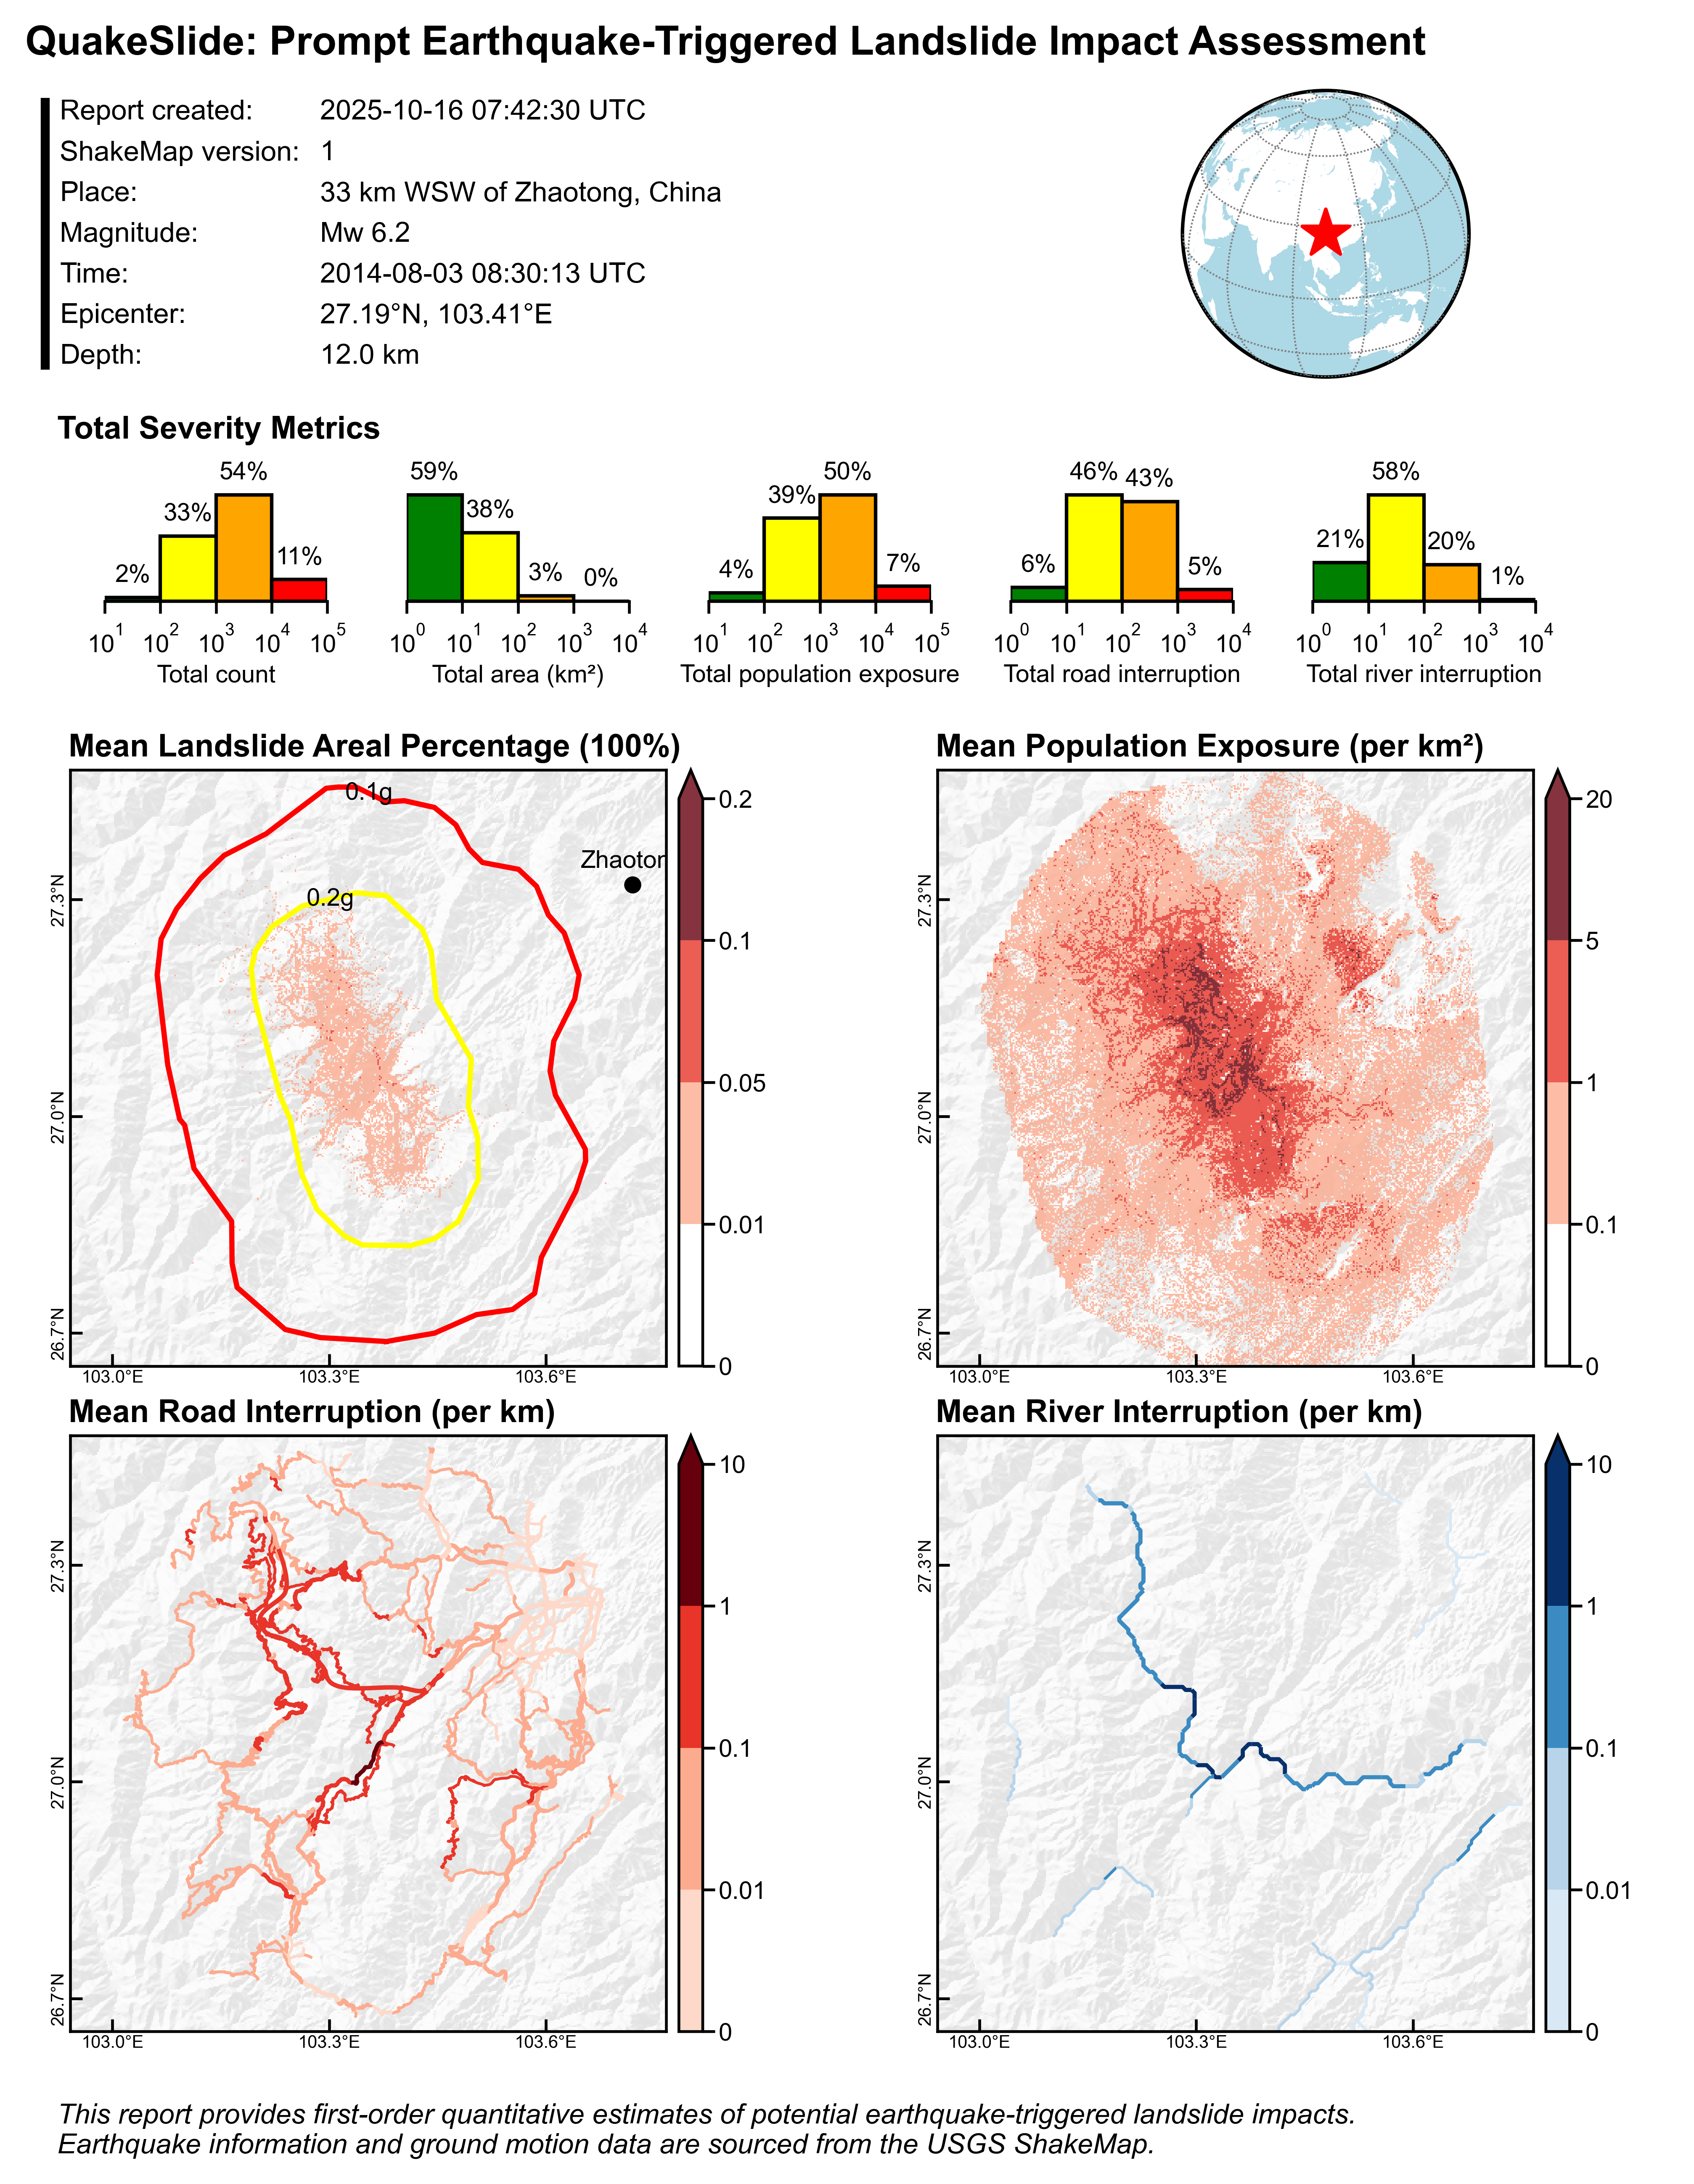

In [2]:
from src.QuakeSlide_main import QuakeSlide, get_cached_data

# Run QuakeSlide assessment with data caching for efficiency
lithology_data, river_network_data, road_network_data = QuakeSlide(
    event_id,
    lithology_data=get_cached_data('lithology_data', globals()),
    river_network_data=get_cached_data('river_network_data', globals()),
    road_network_data=get_cached_data('road_network_data', globals())
)